<a href="https://www.kaggle.com/code/ayushs9020/inventing-knn-from-scratch?scriptVersionId=133380879" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# KNN

<img src = "https://alphacoder.xyz/images/k-nearest-neighbors/ml-meme.jpeg" width = 400>

$K$ $Nearest$ $Neighbors$ $(KNN)$ is a `simple`, `yet powerful` machine learning algorithm that can be used for `both classification and regression` tasks. It works by `finding the k most similar data points` to a new data point, and then using the `labels of those k data points` to `predict the label` of the new data point.

In [1]:
import numpy as np 
import pandas as pd 

from collections import Counter

from imblearn.over_sampling import RandomOverSampler
import seaborn as sns 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s3e17/sample_submission.csv
/kaggle/input/playground-series-s3e17/train.csv
/kaggle/input/playground-series-s3e17/test.csv


In [2]:
data = pd.read_csv("/kaggle/input/playground-series-s3e17/train.csv")

x = data.drop(["id" , "Product ID" , "Type" , "Torque [Nm]" , "Process temperature [K]" , "Tool wear [min]" , "Machine failure" , 
              "TWF" , "HDF" , "PWF" , "OSF" , "RNF"] , axis = 1)

x , y = RandomOverSampler().fit_resample(x , data["Machine failure"])

# 1 | Understanding the Concept 💡

So what is this `big term means` $...?$

Lets try to break it. 

|||
|---|---
|$Classifier$|An algorithm that classifies something into something 
|$Neighbors$|People who lives by our side. Sometimes they are our best firends and sometimes the worst nightmares
|$Nearest$|Something that is closes to us 
|$K$|Frankly speaking this is just an arbitary number. 

So what is this line says...

**`An algorithm that classifies on the baisis of nearest neighbors`**

Lets try to get more picture of this 

Lets assume we have $2$ different societies. `Mathematicians` and `Engineeers`, and they are eneimies of each other. Also they frequenctly attack each other with `pens` and `compasses`. So they like in dense clusters, to protect each other. But some are stubborn so they do not live in clusters, but individuals

Lets assume you are very rich artist, and you went on a tour with you `helicopter`. and saw something like this 

<Axes: xlabel='Air temperature [K]', ylabel='Rotational speed [rpm]'>

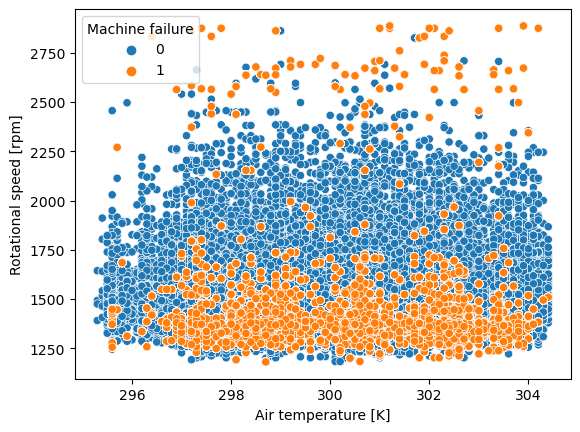

In [3]:
sns.scatterplot(x = x["Air temperature [K]"] , y = x["Rotational speed [rpm]"] , hue = y)

You see that `Mathematicians` haven choosen a colour which is `blue` , and colored their houses as `blue` , and same is the case with the `Engineers` , where the color is `Orange`.

Lets choose a random point from the `dense cluster` of `Mathematicians`, and consider we dont know if this person is a `Mathemetician` or a `Engineer`. If I ask you what this person is, You would say its still difficult to predict but as they live near the `Mathematicians`, there is a comparitvely high chance of them being into the `Mathematician`. 

Thats the same concept applied by `KNN`

At the end we can say that, If we dont know wehter a person is `Mathamtician` or an `Engineer`, we can kind of find that by seeing which community is the closest to that person. or...

**We can find the label of a unknown data point by seeing which label is the closes to the unknown data type.**

# 2 | Euclidean Distance 📐

It is really easy for us to determine distances, but we are also lazy (atleast I am), and thus want machines to do our work. 

So how do we define distance for a machine to work on...?

One way is to find `Euclidian Distance` between $2$ points.

What we can do is to find the `Eucldian Distance` with all the points, then sort them and then find the `smallest ones`, the labels of the smalles ones will be the label of the unknown one. For conviniance we do not just compute the label with the smallest point, we compute the labels of the `k` smallest points, where `k` can be any integer. 

The logic behind `K nearest Neighbors` is to find the `euclidian distance` between `k` nearest points of the point we need to dinf and the point we need to find. As we are dealing with $2$ point coordinate system only(as of now), we will be using the formula

$$Euclidian_-Distance = \sqrt {(x_1 - x_2)^2 + (y_1 - y_2)^2}$$

Talking about the actual dataset, the `Mathemetician` and `Engineers` are changed to `machine with good working condition` and `machine failure`. And the graph is a `scatter plot` for `Air temperature [K]` as $x-axis$ and `Rotational speed [rpm]` as $y-axis$ 

# 3 | Implementing The Concept 🛠️

For an instance lets assume the coordinates of this point is $(400 , 400)$, and we have to find `if a machine failed or not`

In [4]:
x1 = 400
y1 = 400

Apllying the Distance formula for all of the coordinates 

In [5]:
distance = [
    np.sqrt(np.square(x1 - x2) + np.square(y1 - y2)) 
    for x2 , y2 in zip(x["Air temperature [K]"] , x["Rotational speed [rpm]"])
]
distance     

[1200.123476980598,
 1362.4858751561426,
 1408.6040927102263,
 1128.3514523409806,
 1245.184725251639,
 1034.0036556995337,
 1017.9632409866282,
 1213.236452634028,
 1182.4336302727525,
 1051.717286156313,
 1012.8499395270752,
 1036.6900452883688,
 1262.8550827391082,
 1074.9364678900795,
 990.2157593171298,
 1171.4839990371188,
 1056.7043862878586,
 1025.8368535005943,
 1012.8989337540049,
 1012.608636147253,
 1028.7265185655515,
 1159.442521214398,
 1083.5413282381064,
 1074.5701466167764,
 1280.1343054539238,
 1031.760631154339,
 1138.5512241440874,
 1066.9445908762086,
 1096.451407952035,
 1049.7547523112244,
 1111.4985425091659,
 1027.8177659488088,
 1040.4846226638815,
 1164.4496081840553,
 939.5748187345167,
 1077.5574230638476,
 1090.5303709663476,
 1222.03299464458,
 1039.984562385423,
 1091.4627616185537,
 988.1546640076137,
 1130.6375590789473,
 1170.3059813570126,
 1073.437119723368,
 1289.7438660447276,
 1069.9980794375288,
 1132.214537974142,
 1142.4555308632366,
 1119.64

So these are all our distances, now we need to sort them and find their labels 

In [6]:
y[np.argmin(distance)]

1

So our algorithm says this should be an `Machine Failure

If we take more neighbors like $3$, we can get that by 

In [7]:
y[np.argsort(distance)[:3]]

244678    1
145034    1
224827    1
Name: Machine failure, dtype: int64

But how do we count them, or see which label occurs the most, for that we use 

In [8]:
Counter(y[np.argsort(distance)[:3]]).most_common()

[(1, 3)]

or

In [9]:
Counter(y[np.argsort(distance)[:3]]).most_common()[0][0]

1

Now lets try to put all of this into a Function 

# 4 | Final KNN 🎉 

In [10]:
from collections import Counter
import numpy as np 

def KNN(X_train , y_train , X_test):
    
    distance = [0] * X_train.shape[0]
    
    for columns in X_train.columns:
        
        for index in range(len(X_train[columns])):
            
            distance[index] += X_train[columns][index] - X_test[columns][index]
    
    distance = np.sqrt(np.array(distance))
    
    return Counter(y_test[np.argsort(distance)[:3]]).most_common()[0][0]

# 5 | TO DO LIST 📄

```
TO DO 1 : ADD FUNCTIONALITIES

TO DO 2 : ADD METHODS

TO DO 3 : DANCE
```

# 6 | Ending 🌆

**THIS IS NOT THE FULL IMPLEMENTATION, IT STILL LACKS MANY FUNCTIONALITIES AND IS VULENRABLE TO MANY EDGE CASES, WE WILL IMPROVE THIS IN THE UPCOMING VERSIONS**

**PLEASE COMMENT DOWN IF I DID ANY MISTAKES, OR IF CAN MAKE THIS MORE CONNECTED TO THE GROUND, OR SUGGESTIONS. YOUR ASSISTS ARE HIGHLY APPRECIABLE**

**THATS IT FOR TODAY GUYS**

**HOPE YOU UNDERSTOOD AND LIKED MY WORK**

**DONT FORGET TO MAKE AN UPVOTE :)**

<IMG SRC = "https://i.imgflip.com/19aadg.jpg">

**PEACE OUT !!!**